<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

## Classification with Python</font></h1>


##### In this notebook we try to implement a few of the classification algorithms.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [55]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


### Load Data From CSV File


In [56]:
df = pd.read_csv(r'D:\Documents\Notes\Github (Projects)\Prediction-of-Loan-payment-using-Classification\loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,09-08-2016,10-07-2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,09-08-2016,10-07-2016,33,Bachelor,female
2,3,3,PAIDOFF,1000,15,09-08-2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,09-09-2016,10-08-2016,28,college,female
4,6,6,PAIDOFF,1000,30,09-09-2016,10-08-2016,29,college,male


In [57]:
df.shape

(346, 10)

### Convert to date time object


In [58]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bachelor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [59]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


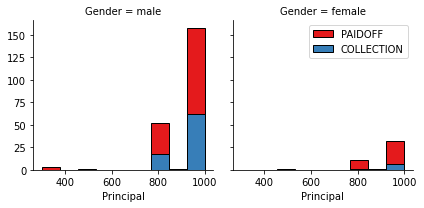

In [60]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

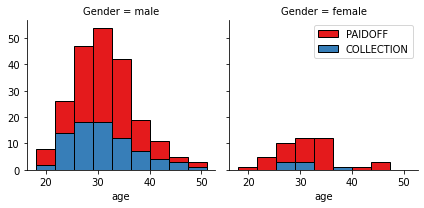

In [61]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


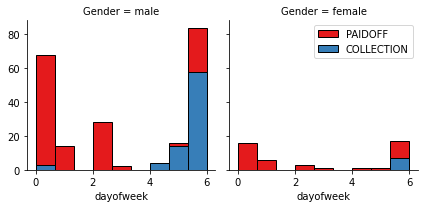

In [62]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [63]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bachelor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [64]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [65]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bachelor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [66]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bachelor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [67]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bachelor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### We use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [68]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bachelor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [69]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bachelor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are the lables?


In [70]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data


Data Standardization give data zero mean and unit variance 


In [71]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification


Now, we use the training set to build an accurate model. Then we use the test set to report the accuracy of the model
We use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression



In [72]:
from sklearn.model_selection import cross_val_score as cvs

In [73]:
#Defining a function to calculate the Cross Validation Score. 
def cv_score(model):
    total=0
    folds=10
    for i in cvs(model, X, y, cv=folds):
        total+=i
        score=total/folds
    return score

# K Nearest Neighbor(KNN)




In [74]:
from sklearn.neighbors import KNeighborsClassifier as KNN

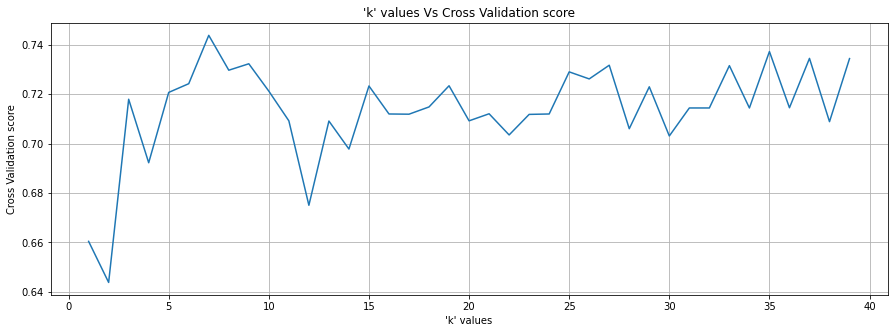

In [75]:
#We approximate the best value for 'k' by plotting the Cross Validation scores for different 'k' values.
k_values=[]
cv_scores=[]
for k in range(1, 40):
    k_values.append(k)
    clf = KNN(n_neighbors=k, metric='euclidean')
    cv_scores.append(cv_score(clf))

plt.figure(figsize=(15,5))
plt.plot(k_values, cv_scores)
plt.title("'k' values Vs Cross Validation score")
plt.xlabel("'k' values")
plt.ylabel("Cross Validation score")
plt.grid()
plt.show()

In [76]:
#Thus we find that for a 'k' value of 7 we have the highest Cross Validation score.
clf = KNN(n_neighbors=7, metric='euclidean')
cv_score(clf)

0.7438655462184873

In [77]:
clf.fit(X,y)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

# Decision Tree


In [78]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(max_depth=8)

In [79]:
#calculating the score using K-fold Cross Validation
cv_score(dtc)

0.6691596638655462

In [80]:
dtc.fit(X, y)

DecisionTreeClassifier(max_depth=8)

# Support Vector Machine


In [81]:
from sklearn.svm import SVC
sv=SVC(C=1, gamma=0.5, kernel='poly')

In [82]:
#calculating the score using K-fold Cross Validation
cv_score(sv)

0.6486554621848739

In [83]:
sv.fit(X, y)

SVC(C=1, gamma=0.5, kernel='poly')

# Logistic Regression


In [84]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=1)

In [85]:
#calculating the score using K-fold Cross Validation
cv_score(lr)

0.703109243697479

In [86]:
lr.fit(X, y)

LogisticRegression(C=1)

# Model Evaluation using Test set


In [87]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


### Load Test set for evaluation


In [88]:
test_df = pd.read_csv(r'D:\Documents\Notes\Github (Projects)\Prediction-of-Loan-payment-using-Classification\loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [89]:
test_df.shape

(54, 10)

In [90]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[1,0],inplace=True)
test_Feature = test_df[['Principal','terms','age','Gender','weekend']]
test_Feature = pd.concat([test_Feature,pd.get_dummies(test_df['education'])], axis=1)
test_Feature.drop(['Master or Above'], axis = 1,inplace=True)
test_X = test_Feature
true_y = test_df['loan_status'].values
test_X = preprocessing.StandardScaler().fit(test_X).transform(test_X)
print('The true values for the loan_status are: (1:PAIDOFF, 0:COLLECTION)')
true_y

The true values for the loan_status are: (1:PAIDOFF, 0:COLLECTION)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [91]:
def convert_arr(arr):
    for i in range(len(arr)):
        if arr[i]=='PAIDOFF':
            arr[i]=1
        else:
            arr[i]=0
    return arr

In [92]:
pred_y_knn = convert_arr(clf.predict(test_X))
jscore_knn=jaccard_score(list(true_y),list(pred_y_knn))
f1score_knn=f1_score(list(true_y),list(pred_y_knn))
print('Evaluation metrics for KNN are - jaccard score: {:0.3f}, f1 score: {:0.3f}'.format(jscore_knn, f1score_knn))
pred_y_knn

Evaluation metrics for KNN are - jaccard score: 0.700, f1 score: 0.824


array([1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1], dtype=object)

In [93]:
pred_y_dtc = convert_arr(dtc.predict(test_X))
jscore_dtc=jaccard_score(list(true_y),list(pred_y_dtc))
f1score_dtc=f1_score(list(true_y),list(pred_y_dtc))
print('Evaluation metrics for Decision Tree are - jaccard score: {:0.3f}, f1 score: {:0.3f}'.format(jscore_dtc, f1score_dtc))
pred_y_dtc

Evaluation metrics for Decision Tree are - jaccard score: 0.776, f1 score: 0.874


array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1], dtype=object)

In [94]:
pred_y_sv = convert_arr(sv.predict(test_X))
jscore_sv=jaccard_score(list(true_y),list(pred_y_sv))
f1score_sv=f1_score(list(true_y),list(pred_y_sv))
print('Evaluation metrics for SVM are - jaccard score: {:0.3f}, f1 score: {:0.3f}'.format(jscore_sv, f1score_sv))
pred_y_sv

Evaluation metrics for SVM are - jaccard score: 0.688, f1 score: 0.815


array([1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1], dtype=object)

In [95]:
pred_y_lr = convert_arr(lr.predict(test_X))
jscore_lr=jaccard_score(list(true_y),list(pred_y_lr))
f1score_lr=f1_score(list(true_y),list(pred_y_lr))
logloss_lr=log_loss(list(true_y),list(lr.predict_proba(test_X)))
print('Evaluation metrics for Logistic Regression are - jaccard score: {:0.3f}, f1 score: {:0.3f}, log loss: {:0.3f}'.format(jscore_lr, f1score_lr, logloss_lr))
pred_y_lr

Evaluation metrics for Logistic Regression are - jaccard score: 0.755, f1 score: 0.860, log loss: 0.481


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=object)

##### The table below summarises the scores on the test set using the four evaluation metrics: 

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.700       | 0.824        | NA      |
| Decision Tree      | 0.776      | 0.874       | NA      |
| SVM                | 0.688       | 0.815       | NA      |
| LogisticRegression | 0.755       | 0.860        | 0.481       |


### We can thus conclude by saying that the Decision Tree would be a relatively better algorithm for the above loan repayment case as it obtained a higher score using both the evaluation metrics.